# Importing Libraries

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression
import franke
from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import ipywidgets as widget
from plots import triangulation_for_triheatmap as triheatmap
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import glob as glob
from IPython.display import Image, display, HTML, Video
%matplotlib inline

# Demo for applying regression to Franke data 

In [2]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, var=0.1) #zero mean gaussian noise has variance = var

In [3]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [4]:
linear_reg.apply_leastsquares(order=5, test_ratio=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014116245343327055
Test MSE 0.0013248046836283561
Train R2 0.9745478727932454
Test R2 0.9762572844118452
Train bias 0.055461947163225105
Test bias 0.05579876520670897
Train model variance 0.05405032263226542
Test model variance 0.05554127233564456


## Apply OLS with bootstrap sampling

In [5]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0013934161885955482
Test MSE 0.0014152167753741349
Train R2 0.9748924366166136
Test R2 0.9744266577040487
Train bias 0.001863576997259745
Test bias 0.0018081449021447166
Train model variance 0.001816265605725281
Test model variance 0.0017850469385755523


## Apply OLS with cross validation sampling

In [6]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014020792611304355
Test MSE 0.0014111252355605178
Train R2 0.9747357862842234
Test R2 0.9745579569705332
Train bias 0.0055572547463643585
Test bias 0.005481661885887652
Train model variance 0.005417224292570765
Test model variance 0.005455186660897617


## Apply Ridge regression 

In [7]:
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035977508697341847
Test MSE 0.003375224685348332
Train R2 0.9353154425643309
Test R2 0.9379168248779229
Train bias 0.05561993490881263
Test bias 0.054371263429219
Train model variance 0.05007006768948615
Test model variance 0.05077828464399036


## Apply Ridge regression with bootstrap

In [8]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035898428759888394
Test MSE 0.0035953506656980715
Train R2 0.9353258178359682
Test R2 0.9352017321603799
Train bias 0.0018602727303718958
Test bias 0.0018404008740976919
Train model variance 0.0016760027441911427
Test model variance 0.0016836048214236357


## Apply Ridge regression with cross validation

In [9]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, ridge=True, lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0035874751540000715
Test MSE 0.0035958845323289445
Train R2 0.9353553922409248
Test R2 0.9350682990588945
Train bias 0.005538449691263484
Test bias 0.00563702397437677
Train model variance 0.00498675862869123
Test model variance 0.0051104050844578966


## Apply Lasso regression: Not working properly. High R2 value

In [10]:
linear_reg.apply_leastsquares(order=3, test_ratio=0.1, scikit_lasso=True, lmbda=0.02)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)


[ 0.42031274 -0.         -0.         -0.23699842 -0.         -0.08778714
 -0.         -0.         -0.         -0.        ]
Train MSE 0.06163891492846793
Test MSE 0.06227160463136646
Train R2 -10004.65177399387
Test R2 -1111.4613885964445
Train bias 0.05584325576335083
Test bias 0.05644133181814116
Train model variance 0.005795659165116997
Test model variance 0.005830272813225312


In [11]:
x_train, x_test, y_train, y_test = train_test_split(np.hstack([linear_reg.x1, linear_reg.x2]), linear_reg.y, test_size=0.1)
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

x1_test = x_test[:, 0]
x2_test = x_test[:, 1]
X = linear_regression.design_mat2D(x1_train, x2_train, order=3)
lasso_reg = linear_model.Lasso(0.01, fit_intercept=False)
lasso_reg.fit(np.asmatrix(X), np.asmatrix(y_train))
y_model_train = lasso_reg.predict(X)
y_model_test = lasso_reg.predict(linear_regression.design_mat2D(x1_test, x2_test, order=3))
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

0.0
[ 0.53287865 -0.         -0.01673124 -0.38464557 -0.         -0.21862761
 -0.         -0.         -0.         -0.        ]


/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [12]:
print(y_model_train)
y_model_test

[0.34491042 0.4127159  0.41166601 ... 0.48703921 0.43670074 0.43794515]


array([ 0.32030654,  0.22687651,  0.35694235,  0.4386501 ,  0.45061241,
        0.27088877,  0.25826907,  0.22951821,  0.40654742,  0.22847209,
        0.15667724,  0.29227133,  0.38703636,  0.528992  ,  0.11919073,
        0.22098178,  0.33875843,  0.31152778,  0.31916035,  0.13841935,
        0.0600679 ,  0.25846338,  0.51492291,  0.22821716,  0.41731208,
        0.29190059,  0.43845879,  0.43683305,  0.22572519,  0.19095179,
        0.46234876,  0.18174933,  0.42467405,  0.20685339,  0.48884197,
        0.24169148,  0.44411234,  0.26640312,  0.21914818,  0.32924268,
        0.21117442,  0.38856961,  0.51827366,  0.52499522,  0.24665758,
        0.21406018,  0.0767453 ,  0.41138124,  0.45099397,  0.23108536,
        0.29552132,  0.3257222 ,  0.34623778,  0.11362017,  0.23892435,
        0.34219093,  0.26689809,  0.40041743,  0.39454417,  0.16920386,
        0.08675348,  0.47319737,  0.2877527 ,  0.36446721,  0.39504229,
        0.48159765,  0.50616363,  0.2180895 ,  0.38799566,  0.39

In [13]:
x1 = np.linspace(1,10,10)
x2 = np.linspace(1,10,10)
y = np.linspace(4,23,10)
x_train, x_test, y_train, y_test = train_test_split(np.hstack([linear_reg.x1, linear_reg.x2]), linear_reg.y, test_size=0.1)
x1_train = x_train[:, 0]
x2_train = x_train[:, 1]

x1_test = x_test[:, 0]
x2_test = x_test[:, 1]
X = linear_regression.design_mat2D(x1_train, x2_train, order=1)
lasso_reg = linear_model.Lasso(0.01, fit_intercept=False)
lasso_reg.fit(np.asmatrix(X), np.asmatrix(y_train))
y_model_train = lasso_reg.predict(X)
y_model_test = lasso_reg.predict(linear_regression.design_mat2D(x1_test, x2_test, order=1))
print(lasso_reg.intercept_)
print(lasso_reg.coef_)

/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/quasar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.0
[ 0.62332713 -0.36979044 -0.2334446 ]


# Regression Comparisons

In [110]:
p = np.arange(1,6)
n = np.array([100])#, 200, 30])
noise = np.array([0.0, 0.25, 0.5, 0.75, 1])*100.0
r = np.arange(1,5)*0.1



In [111]:
def apply_regression(p, n, noise, r, reg_type="ols", **kwargs): #applies regression for multiple parameter combos
    train_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    test_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    train_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    test_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    for j in range(len(n)):
        for k in range(len(noise)):
            x1 = np.linspace(0,1,n[j])
            x2 = np.linspace(0,1,n[j])
            xx1, xx2 = np.meshgrid(x1, x2)
            xx1 = xx1.reshape((n[j]*n[j]),1)
            xx2 = xx2.reshape((n[j]*n[j]),1)
            y = franke.Franke(xx1, xx2, var=noise[k])
            linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
            for i in range(len(p)):
                for l in range(len(r)):
                    #if(reg_type == "ols"):
                    linear_reg.apply_leastsquares(order=p[i], test_ratio=r[l])
                    
                    train_MSE_arr[i,j,k,l] = linear_reg.trainMSE
                    test_MSE_arr[i,j,k,l] = linear_reg.testMSE
                    train_R2_arr[i,j,k,l] = linear_reg.trainR2
                    test_R2_arr[i,j,k,l] = linear_reg.testR2
    return train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr

def apply_regression2(p, n, noise, r, reg_type="ols", **kwargs): #applies regression for multiple parameter combos
    train_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    test_MSE_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    train_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    test_R2_arr = np.zeros([len(p), len(n), len(noise), len(r)])
    for i in range(len(p)):
        for j in range(len(n)):
            for k in range(len(noise)):
                for l in range(len(r)):
                    x1 = np.linspace(0,1,n[j])
                    x2 = np.linspace(0,1,n[j])
                    xx1, xx2 = np.meshgrid(x1, x2)
                    xx1 = xx1.reshape((n[j]*n[j]),1)
                    xx2 = xx2.reshape((n[j]*n[j]),1)
                    y = franke.Franke(xx1, xx2, var=noise[k])
                    linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 
                    linear_reg.apply_leastsquares(order=p[i], test_ratio=r[l])

                    train_MSE_arr[i,j,k,l] = linear_reg.trainMSE
                    test_MSE_arr[i,j,k,l] = linear_reg.testMSE
                    train_R2_arr[i,j,k,l] = linear_reg.trainR2
                    test_R2_arr[i,j,k,l] = linear_reg.testR2
    return train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr

In [112]:
train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr = apply_regression(p, n, noise, r, reg_type="ols")

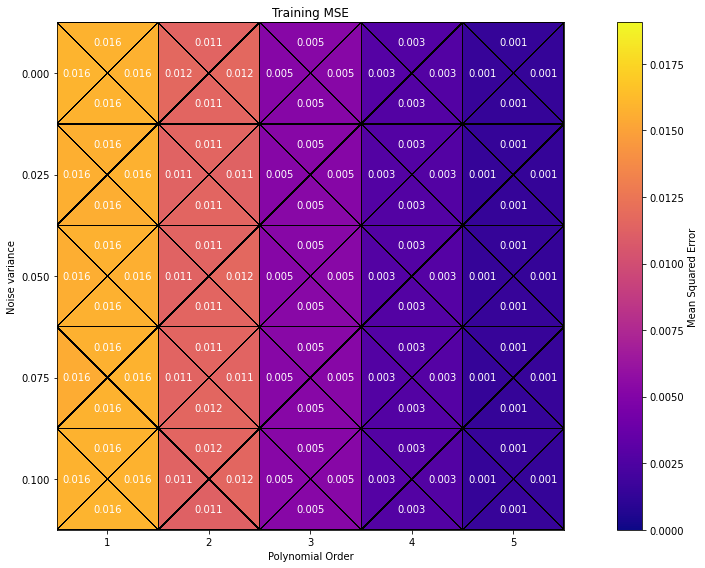

In [113]:
M = len(p)
N = len(noise)
values = [np.transpose(train_MSE_arr[:, 0, : , 0]), np.transpose(train_MSE_arr[:, 0, : , 1]),
          np.transpose(train_MSE_arr[:, 0, : , 2]), np.transpose(train_MSE_arr[:, 0, : , 3])]

triangul = triheatmap(M, N)
fig, ax = plt.subplots(figsize=(15,8))
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=np.max(values)*1.2, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.3f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)
ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")
ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Training MSE")
plt.tight_layout()
plt.show()

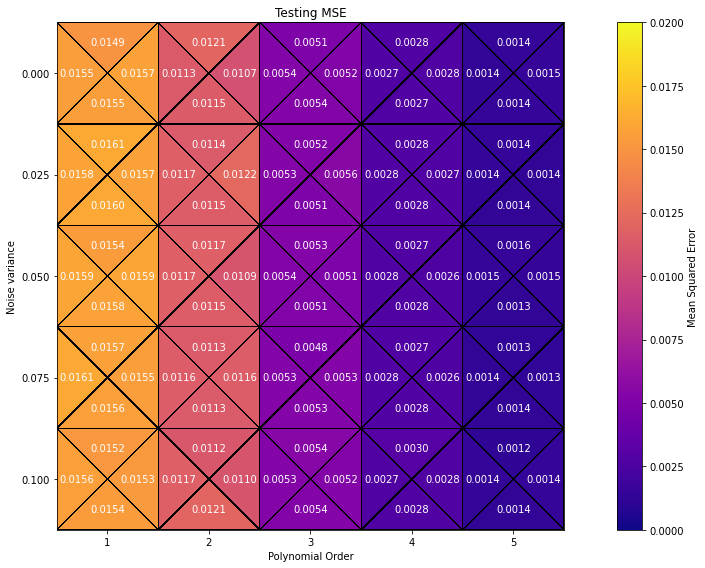

In [114]:
M = len(p)
N = len(noise)
values = [np.transpose(test_MSE_arr[:, 0, : , 0]), np.transpose(test_MSE_arr[:, 0, : , 1]),
          np.transpose(test_MSE_arr[:, 0, : , 2]), np.transpose(test_MSE_arr[:, 0, : , 3])]

triangul = triheatmap(M, N)
fig, ax = plt.subplots(figsize=(15,8))
imgs = [ax.tripcolor(t, val.ravel(), cmap='plasma', vmin=0, vmax=0.02, ec='k')
        for t, val in zip(triangul, (values))]
for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    for i in range(M):
        for j in range(N):
            v = val[j, i]
            ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.4f}', color='k' if 0.02 < v < 0.2 else 'w', ha='center', va='center')
ax.set_xticks(range(M))
ax.set_yticks(range(N))

def ymajor_tick(x, pos):
    return f"{x*0.025:.3f}"
def xmajor_tick(x, pos):
    return f"{x+1}"

ax.yaxis.set_major_locator(MultipleLocator(1.000))
# FuncFormatter is created and used automatically
ax.yaxis.set_major_formatter(ymajor_tick)
ax.xaxis.set_major_formatter(xmajor_tick)

ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_xlabel("Polynomial Order")
ax.set_ylabel("Noise variance")
ax.set_aspect('equal', 'box')  # square cells
cbar = fig.colorbar(imgs[0], ax=ax, label = "Mean Squared Error")
ax.set_title("Testing MSE")
plt.tight_layout()
plt.show()

In [115]:
def plot_stats(train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr,
               p, n, noise, r, ratio=0.1, num=100, mode="test MSE"):
    n_ind = 0
    for i in range(len(n)):
        if num == n[i]:
            n_ind = i
    r_ind = 0
    for i in range(len(r)):
        if ratio == r[i]:
            r_ind = i
    if mode=="test MSE":
        sns.heatmap(test_MSE_arr[:,n_ind, :, r_ind])
    

In [116]:
widget.interact(plot_stats(), train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr,
               p, n, noise, r, ratio=0.1, num=100, mode="test MSE")

TypeError: plot_stats() missing 8 required positional arguments: 'train_MSE_arr', 'test_MSE_arr', 'train_R2_arr', 'test_R2_arr', 'p', 'n', 'noise', and 'r'

In [ ]:
widget.interact(plot_stats, train_MSE_arr)

In [ ]:
def f(x, y, z):
    return x

In [ ]:
widget.interact(f, x=True, y=[1,2], z =3)

In [ ]:
widget.IntSlider()

In [ ]:
def plot_stat(train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr, 
             p, n, noise, r, ratio=0.1, num=100):
    n_ind = 0
    for i in range(len(n)):
        if(num==n[i]):
            n_ind = i
    r_ind = 0
    for i in range(len(r)):
        if(ratio==r[i]):
            r_ind = i
    sns.heatmap(train_MSE_arr[:, n_ind, :, r_ind])

plot_stat(train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr, 
             p, n, noise, r, ratio=0.1, num=100):

In [ ]:
widget.FloatSlider(
    value=0.1,
    min=0,
    max=0.5,
    step=0.1,
    description='Testing Ratio:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

In [ ]:
widget.interact_manual(plot_stat(train_MSE_arr, test_MSE_arr, train_R2_arr, test_R2_arr, 
             p, n, noise, r), ratio=(0.1, 0.5, 0.1), num=[100])

In [117]:
@interact(x=2, y=1.0)
def g(x, y):
    plt.scatter(x,y)

interactive(children=(IntSlider(value=2, description='x', max=6, min=-2), FloatSlider(value=1.0, description='…

In [118]:
@interact(train_MSE=train_MSE_arr)
def plot_stat(train_MSE):
    n_ind = 0
    #for i in range(len(n)):
    #    if(num==n[i]):
    #        n_ind = i
    r_ind = 0
    #for i in range(len(r)):
    #    if(ratio==r[i]):
    #        r_ind = i
    sns.heatmap(train_MSE[:, n_ind, :, r_ind])


TraitError: Invalid selection: value not found

In [119]:
#@interact(trainMSE=train_MSE_arr, rind=[0.1,0.2,0.3])
#def plot_my_stat(trainMSE):
#    sns.heatmap(trainMSE[:,0,:,rind])
train_MSE_arr.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [120]:
def plot_stat(trainMSE, rind=0):
    sns.heatmap(trainMSE[:,0,:,rind])
widget.interact(plot_stat, trainMSE=train_MSE_arr)


TraitError: Invalid selection: value not found

In [121]:
def plot_xyz(x, y=1):
    plt.scatter(x,y)
widget.interact(plot_xyz, x=[0.1,0.2])


interactive(children=(Dropdown(description='x', options=(0.1, 0.2), value=0.1), IntSlider(value=1, description…

<function __main__.plot_xyz(x, y=1)>

In [122]:
widget.interactive(plot_xyz, x=[0.1, 0.2])

interactive(children=(Dropdown(description='x', options=(0.1, 0.2), value=0.1), IntSlider(value=1, description…

In [123]:
def plot_stat(trainMSE, rind):
    sns.heatmap(trainMSE[:,0,:,rind])
plotw = widget.interact(plot_stat, trainMSE=train_MSE_arr, rind=[0,1])
with plotw.hold_trait_notifications():
    plotw.options=[0,1]
    plotw.trainMSE=train_MSE_arr
display(plotw)

TraitError: Invalid selection: value not found